In [1]:
import pandas as pd

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [4]:
wego['ADHERENCE'].max()

88.383333

In [5]:
wego['ADHERENCE'].min()

-948.533333

In [6]:
wego.groupby('ROUTE_ABBR').mean('ADHERENCE', 'SCHEDULED_HDWY')[['ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY']]

,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY
ROUTE_ABBR,,,
3,-3.761491,19.523403,20.133135
7,-3.346555,22.785186,23.161475
22,-1.138107,29.992722,30.600886
23,-1.760110,18.373912,19.275453
50,-2.505022,19.528756,19.753606
52,-3.971342,19.980827,20.849976
55,-4.823302,13.581157,13.858523
56,-2.703988,13.983759,14.158662


In [7]:
wego['ACTUAL_HDWY'].max()

590.433333

In [8]:
wego['ACTUAL_HDWY'].min()

0.0

In [9]:
wego['ACTUAL_HDWY'].mean()

18.648561468875673

In [10]:
wego.groupby('ROUTE_ABBR').count()[['TRIP_ID']]

,TRIP_ID
ROUTE_ABBR,
3,47162
7,18026
22,25959
23,42108
50,43291
52,51819
55,61944
56,60020


#### 4. How does time of day or day of week affect headway and on-time performance?

In [12]:
mean = wego.groupby('SERVICE_ABBR').mean('ADHERENCE')[['ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY']]

In [13]:
mean

,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY
SERVICE_ABBR,,,
1,-3.215421,16.407707,16.801986
2,-3.584496,25.150814,25.777915
3,-2.513130,25.302967,26.198863


In [14]:
wego[['SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ADHERENCE']]

,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ADHERENCE
0,NaN,NaN,NaN,2023-08-01 04:42:00,2023-08-01 04:37:38,-2.133333
1,NaN,NaN,NaN,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000
2,NaN,NaN,NaN,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333
3,NaN,NaN,NaN,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333
4,NaN,NaN,NaN,2023-08-01 05:15:00,2023-08-01 05:03:43,-1.583333
...,...,...,...,...,...,...
350324,30.0,35.266666,5.266666,2023-09-30 22:23:00,2023-09-30 22:31:26,-8.433333
350325,NaN,NaN,NaN,2023-09-30 22:38:00,2023-09-30 22:49:18,-11.300000
350326,30.0,31.866666,1.866666,2023-09-30 22:45:00,2023-09-30 22:49:19,-4.316666
350327,30.0,47.500000,17.500000,2023-09-30 22:59:00,2023-09-30 23:21:05,-22.083333


In [15]:
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], format = '%Y-%m-%d %H:%M:%S')

In [16]:
wego['SCHEDULED_TIME']

0        2023-08-01 04:42:00
1        2023-08-01 04:46:00
2        2023-08-01 04:54:00
3        2023-08-01 05:10:00
4        2023-08-01 05:15:00
                 ...        
350324   2023-09-30 22:23:00
350325   2023-09-30 22:38:00
350326   2023-09-30 22:45:00
350327   2023-09-30 22:59:00
350328   2023-09-30 23:11:00
Name: SCHEDULED_TIME, Length: 350329, dtype: datetime64[ns]

In [17]:
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'], format = '%Y-%m-%d %H:%M:%S')

In [18]:
wego['ACTUAL_ARRIVAL_TIME']

0        2023-08-01 04:37:38
1        2023-08-01 04:48:27
2        2023-08-01 04:54:56
3        2023-08-01 05:03:43
4        2023-08-01 05:03:43
                 ...        
350324   2023-09-30 22:31:26
350325   2023-09-30 22:49:18
350326   2023-09-30 22:49:19
350327   2023-09-30 23:21:05
350328   2023-09-30 23:31:27
Name: ACTUAL_ARRIVAL_TIME, Length: 350329, dtype: datetime64[ns]

In [41]:
wego['SCHEDULED_TIME'].dt.time

0         04:42:00
1         04:46:00
2         04:54:00
3         05:10:00
4         05:15:00
            ...   
350324    22:23:00
350325    22:38:00
350326    22:45:00
350327    22:59:00
350328    23:11:00
Name: SCHEDULED_TIME, Length: 350329, dtype: object

In [89]:
categories = {'morning': '6:00:00', 'afternoon': '12:00:00', 'evening': '18:00:00','night_time': '00:00:01'}
morning = categories['morning'] 
afternoon = categories['afternoon']
evening = categories['evening']
night = categories['night_time']

In [91]:
wego['TIME_CATEGORY'] = wego['SCHEDULED_TIME'].apply(lambda x:'morning' if x.strftime('%H:%M')<afternoon else
                                        'afternoon' if x.strftime('%H:%M')<evening else 'evening' 
                                          if x.strftime('%H:%M')<night else 'night')

In [92]:
wego[['SCHEDULED_TIME','TIME_CATEGORY']]

,SCHEDULED_TIME,TIME_CATEGORY
0,2023-08-01 04:42:00,morning
1,2023-08-01 04:46:00,morning
2,2023-08-01 04:54:00,morning
3,2023-08-01 05:10:00,morning
4,2023-08-01 05:15:00,morning
...,...,...
350324,2023-09-30 22:23:00,night
350325,2023-09-30 22:38:00,night
350326,2023-09-30 22:45:00,night
350327,2023-09-30 22:59:00,night


In [23]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                350329 non-null  int64         
 1   SERVICE_ABBR               350329 non-null  int64         
 2   ADHERENCE_ID               350329 non-null  int64         
 3   DATE                       350329 non-null  object        
 4   ROUTE_ABBR                 350329 non-null  int64         
 5   BLOCK_ABBR                 350329 non-null  int64         
 6   OPERATOR                   350329 non-null  int64         
 7   TRIP_ID                    350329 non-null  int64         
 8   OVERLOAD_ID                350329 non-null  int64         
 9   ROUTE_DIRECTION_NAME       350329 non-null  object        
 10  TIME_POINT_ABBR            350329 non-null  object        
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64 

In [85]:
wego.groupby(['ROUTE_ABBR', 'TIME_CATEGORY']).mean('ADHERENCE')[['ADHERENCE', 'SCHEDULED_HDWY',	'ACTUAL_HDWY', 'HDWY_DEV']]

ADHERENCE  SCHEDULED_HDWY  ACTUAL_HDWY  HDWY_DEV
ROUTE_ABBR TIME_CATEGORY                                                  
3          afternoon      -4.289666       16.768608    17.364903  0.578313
           morning        -3.163851       18.176542    18.671951  0.402455
           night          -3.961969       26.627261    27.547980  0.903915
7          afternoon      -4.969503       19.567181    20.117216  0.492760
           morning        -1.579724       21.155907    21.343468  0.165110
           night          -3.755583       30.729060    31.151764  0.372046
22         afternoon      -1.124866       27.953871    28.216793  0.867103
           morning        -0.642541       27.672533    28.316558  0.751784
           night          -2.086437       37.488894    38.686793  1.462909
23         afternoon      -1.899631       15.796930    16.612030  0.932879
           morning        -1.487877       16.974513    17.954239  1.277901
           night          -2.027041       25.070544    25.925485  0.857999
50         afternoon      -3.192915       16.218512    16.399841  0.173850
           morning        -2.054179       18.459232    18.764107  0.292233
           night          -2.127175       27.071320    27.257909  0.139791
52         afternoon      -4.946482       18.932876    19.762068  1.093295
           morning        -2.934865       18.003535    18.367341  0.580015
           night          -4.319070       24.772451    26.651625  1.460666
55         afternoon      -5.337795       11.574962    11.976003  0.390107
           morning        -4.001909       12.221195    12.328738  0.089755
           night          -5.598880       19.921970    20.352846  0.377953
56         afternoon      -3.305199       11.833065    11.982156  0.138368
           morning        -2.010830       12.954666    13.123720  0.140238
           night          -2.947687       19.490464    19.691628  0.183572

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hayli\AppData\Local\Temp\ipykernel_18792\2574356659.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="TIME_CATEGORY", y="ADHERENCE", data=wego, ci=None);


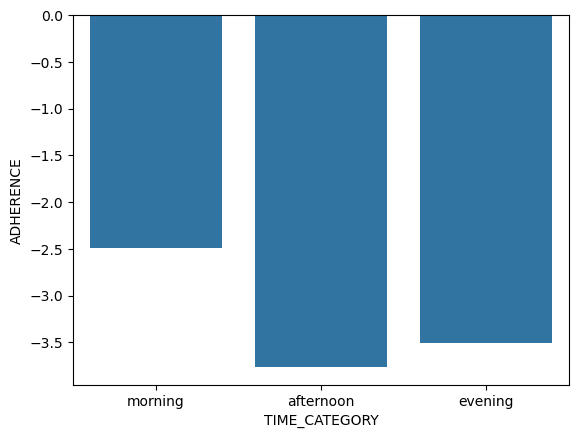

In [31]:
sns.barplot(x="TIME_CATEGORY", y="ADHERENCE", data=wego, ci=None);

C:\Users\hayli\AppData\Local\Temp\ipykernel_18792\3462714546.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="TIME_CATEGORY", y="HDWY_DEV", data=wego, ci=None);


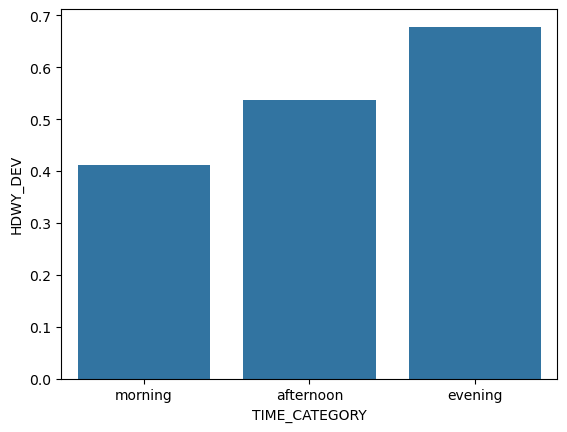

In [33]:
sns.barplot(x="TIME_CATEGORY", y="HDWY_DEV", data=wego, ci=None);